In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv("booksENG_ref.csv")
df.head()

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,Bookauthor_no,Bookauthor_Main,Bookauthor_Co1,Bookauthor_Co2,Age_years,title_nwords
0,A Christmas Carol,4.05,en-CA,160,4359,353,Candlewick Press,2,Charles Dickens,P.J. Lynch,0,14,3
1,Creepers,3.66,en-CA,388,4513,515,CDS Books,1,David Morrell,0,0,15,1
2,A Circle of Quiet (Crosswicks Journals #1),4.21,en-CA,246,5236,506,HarperOne,1,Madeleine L'Engle,0,0,36,7
3,The Last Shot: City Streets Basketball Dreams,4.17,en-CA,233,5106,155,Mariner Books,1,Darcy Frey,0,0,16,8
4,A Theory of Fun for Game Design,3.94,en-CA,256,2113,181,Paraglyph Press,2,Raph Koster,Will Wright,0,16,7


In [4]:
df.columns

Index(['title', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publisher', 'Bookauthor_no',
       'Bookauthor_Main', 'Bookauthor_Co1', 'Bookauthor_Co2', 'Age_years',
       'title_nwords'],
      dtype='object')

In [5]:
df_model = df[['average_rating', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publisher', 'Bookauthor_no', 'Age_years','title_nwords','Bookauthor_Main']]

In [6]:
df_dum = pd.get_dummies(df_model)

In [7]:
df_dum.head()

,average_rating,num_pages,ratings_count,text_reviews_count,Bookauthor_no,Age_years,title_nwords,language_code_en-CA,language_code_en-GB,language_code_en-US,language_code_eng,language_code_enm,publisher_1st Book Library,publisher_1st World Library,publisher_A & C Black (Childrens books),publisher_A Harvest Book/Harcourt Inc.,publisher_A K PETERS,publisher_AA World Services,publisher_ACE,publisher_ADV Manga,publisher_AHA! Process,publisher_AIT Planet Lar,publisher_AK Press,publisher_ASCD,publisher_AVA Publishing,publisher_Abacus,publisher_Abacus Books,publisher_Abacus Books (London),publisher_Abdo Publishing Company,publisher_Abingdon Press,publisher_Abradale Books/Harry N. Abrams,publisher_Abraham Guillen Press,publisher_Abrams,publisher_Absolute Press,publisher_Abstract Studio,publisher_Academica Press,publisher_Academy Chicago Publishers,publisher_Ace,publisher_Ace Book,publisher_Ace Books,...,Bookauthor_Main_Willie Dixon,Bookauthor_Main_Wilma Davidson,Bookauthor_Main_Wilson Rawls,Bookauthor_Main_Winston S. Churchill,Bookauthor_Main_Wisława Szymborska,Bookauthor_Main_Witold Gombrowicz,Bookauthor_Main_Wole Soyinka,Bookauthor_Main_Wolfgang Amadeus Mozart,Bookauthor_Main_Woody Hochswender,Bookauthor_Main_Xavier de C.,Bookauthor_Main_Xenophon,Bookauthor_Main_Yann Martel,Bookauthor_Main_Yasuhiro Kano,Bookauthor_Main_Yasunari Kawabata,Bookauthor_Main_Yayoi Ogawa,Bookauthor_Main_Yefim Gordon,Bookauthor_Main_Yehuda Koren,Bookauthor_Main_Yochai Benkler,Bookauthor_Main_Yohanan Aharoni,Bookauthor_Main_Yona Zeldis McDonough,Bookauthor_Main_Yosef A.A. Ben-Jochannan,Bookauthor_Main_Yoshitaka Amano,Bookauthor_Main_Youka Nitta,Bookauthor_Main_Yu Aida,Bookauthor_Main_Yuki Shimizu,Bookauthor_Main_Yukito Kishiro,Bookauthor_Main_Yumi Hotta,Bookauthor_Main_Yunus A. Cengel,Bookauthor_Main_Yvon Chouinard,Bookauthor_Main_Yvonne Tasker,Bookauthor_Main_Zadie Smith,Bookauthor_Main_Zak Smith,Bookauthor_Main_Zecharia Sitchin,Bookauthor_Main_Zilpha Keatley Snyder,Bookauthor_Main_Zolar,Bookauthor_Main_Zora Neale Hurston,Bookauthor_Main_Zoë Heller,Bookauthor_Main_bell hooks,Bookauthor_Main_Åsne Seierstad,Bookauthor_Main_Émile Zola
0,4.05,160,4359,353,2,14,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.66,388,4513,515,1,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.21,246,5236,506,1,36,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.17,233,5106,155,1,16,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.94,256,2113,181,2,16,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10477 entries, 0 to 10476
Columns: 6171 entries, average_rating to Bookauthor_Main_Émile Zola
dtypes: float64(1), int64(6), uint8(6164)
memory usage: 62.1 MB


In [9]:
X = df_dum.drop('average_rating',axis =1)
y = df_dum['average_rating'].values

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

StatModel ordinary linear model

In [11]:
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     4.442
Date:                Wed, 23 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:55:53   Log-Likelihood:                 7206.6
No. Observations:               10477   AIC:                            -3435.
Df Residuals:                    4988   BIC:                         3.640e+04
Df Model:                        5488                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                               3.1519      0.030    106.573      0.000       3.094       3.210
num_pages                                                                           0.0003   1.27e-05     20.610      0.000       0.000       0.000
ratings_count                                                                   -5.086e-09   3.96e-08     -0.128      0.898   -8.27e-08    7.26e-08
text_reviews_count                                                                5.46e-06   1.84e-06      2.973      0.003    1.86e-06    9.06e-06
Bookauthor_no                                                                      -0.0021      0.002     -1.388      0.165      -0.005       0.001
Age_years                                                                           0.0022      0.000      5.438      0.000       0.001       0.003
title_nwords                                                                        0.0109      0.001     12.754      0.000       0.009       0.013
language_code_en-CA                                                                 0.7255      0.096      7.550      0.000       0.537       0.914
language_code_en-GB                                                                 0.5844      0.032     18.125      0.000       0.521       0.648
language_code_en-US                                                                 0.5668      0.029     19.568      0.000       0.510       0.624
language_code_eng                                                                   0.5800      0.028     20.407      0.000       0.524       0.636
language_code_enm                                                                   0.6952      0.106      6.559      0.000       0.487       0.903
publisher_1st Book Library                                                         -0.2162      0.213     -1.015      0.310      -0.634       0.201
publisher_1st World Library                                                         0.0975      0.186      0.523      0.601      -0.268       0.463
publisher_A & C Black (Childrens books)                                             0.4178      0.254      1.645      0.100      -0.080       0.916
publisher_A Harvest Book/Harcourt  Inc.                                             0.0098      0.182      0.054      0.957      -0.347       0.366
publisher_A K PETERS                                                                0.3057      0.088      3.468      0.001       0.133       0.479
publisher_AA World Services                                                         0.1563      0.132      1.188      0.235

Sklearn linear model

In [12]:
cv_modified = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
cv_LRReg = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

Linear regression

In [17]:
LRegression = LinearRegression()
LR_scores = cross_val_score(LRegression, X_train, y_train, cv=cv_LRReg,scoring='neg_mean_absolute_error')
print(LR_scores)
LR_scores.mean()

[-0.20644991 -0.20662774]


-0.20653882516000016

Lasso Regression

In [19]:
LassoRegression = Lasso()
LsR_scores = cross_val_score(LassoRegression, X_train, y_train, cv=cv_modified,scoring='neg_mean_absolute_error')
print(LsR_scores)
LsR_scores.mean()

[-0.22047595 -0.218055   -0.21879684]


-0.21910926222667979

In [ ]:
LsR_alpha = []
LsR_error = []
for alpha in range(1,100):
    print(alpha)
    LsR_alpha.append(alpha/100)
    LassoRegression = Lasso(alpha=alpha/100)
    LsR_error.append(cross_val_score(LassoRegression, X_train, y_train, cv=cv_modified,scoring='neg_mean_absolute_error').mean())


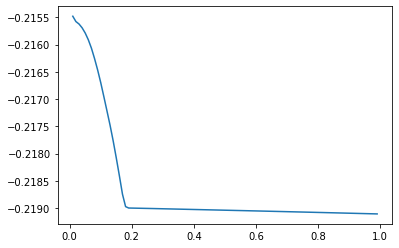

In [22]:
plt.plot(LsR_alpha,LsR_error)

In [23]:
LsR_ErrorTable = []
for i in range(len(LsR_alpha)):
    LsR_err_Log = dict()
    LsR_err_Log['LsR_alpha'] = LsR_alpha[i]
    LsR_err_Log['LsR_error'] = LsR_error[i]
    LsR_ErrorTable.append(LsR_err_Log)

In [24]:
df_LsR_ErrTB = pd.DataFrame(LsR_ErrorTable)

In [25]:
df_LsR_ErrTB[df_LsR_ErrTB.LsR_error == df_LsR_ErrTB.LsR_error.max()]

,LsR_alpha,LsR_error
0,0.01,-0.215482


Random Forest

In [26]:
RfRegressor = RandomForestRegressor()
RfReg_scores = cross_val_score(RfRegressor,X_train, y_train, cv=cv_modified,scoring='neg_mean_absolute_error')
print(RfReg_scores)
RfReg_scores.mean()

[-0.20029457 -0.19693745 -0.19802564]


-0.1984192208308488

Grid Search

In [27]:
RfReg_Parameters ={'n_estimators':range(100,1000,100),'criterion':("mse","mae"),'max_features':("auto","sqrt","log2")}

In [ ]:
RfReg_GS = GridSearchCV(RfRegressor,RfReg_Parameters,cv=cv_modified,scoring='neg_mean_absolute_error')
RfReg_GS.fit(X_train,y_train)

In [ ]:
RfReg_GS.best_score_

In [ ]:
RfReg_GS.best_estimator_

Test Ensembles

In [13]:
#Best Models
LRegression = LinearRegression()
LRegression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
LassoRegression = Lasso(alpha = 0.01)
LassoRegression.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
RfRegressor = RandomForestRegressor()
RfRegressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
y_pred_LRReg = LRegression.predict(X_test)
y_pred_LsRReg = LassoRegression.predict(X_test)
y_pred_RfReg = RfRegressor.predict(X_test)

In [17]:
#Mean Absolute Erorr
mea_LRReg = mean_absolute_error(y_test,y_pred_LRReg)
mea_LsRReg = mean_absolute_error(y_test,y_pred_LsRReg)
mea_RfReg = mean_absolute_error(y_test,y_pred_RfReg)

In [22]:
print("mean absolute error for Linear Regression: ",mea_LRReg)
print("mean absolute error for Lasso Regression: ",mea_LsRReg)
print("mean absolute error for RandomForest Regression: ",mea_RfReg)

mean absolute error for Linear Regression:  0.19057191852256267
mean absolute error for Lasso Regression:  0.22120621422822762
mean absolute error for RandomForest Regression:  0.19611483778625952
